# Machine Learning Algorithms Tutorial
## SVMs, Decision Trees, and KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import seaborn as sns


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

## Part 1: Support Vector Machines (SVM)

### Generate linearly separable data

In [4]:

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                         n_informative=2, random_state=1,
                         n_clusters_per_class=1)

In [5]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


### Linear SVM Classification
Linear SVM accuracy: 1.0000


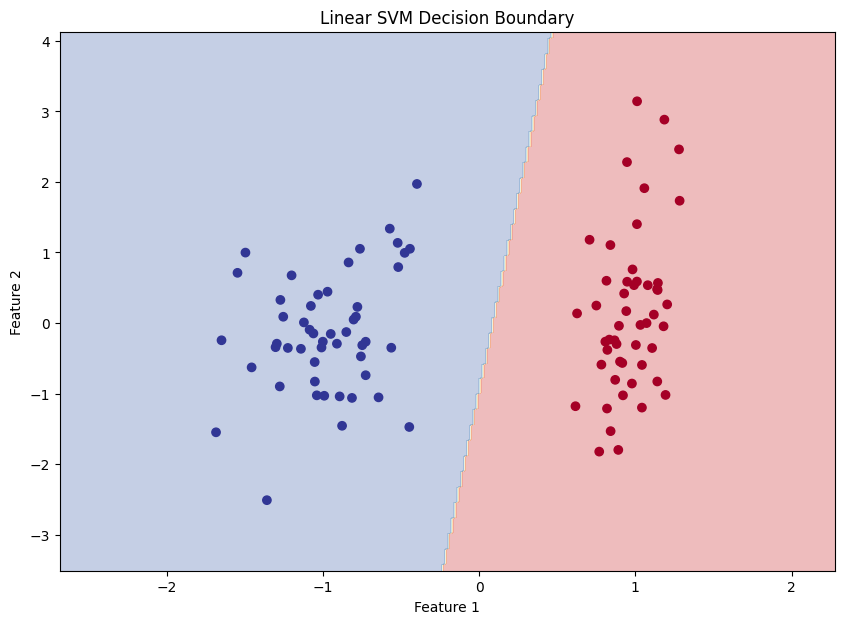

In [7]:
# Linear SVM
print("\n### Linear SVM Classification")
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)
linear_score = linear_svm.score(X_test, y_test)
print(f"Linear SVM accuracy: {linear_score:.4f}")
plot_decision_boundary(linear_svm, X, y, "Linear SVM Decision Boundary")



### Soft Margin Classification
Soft Margin SVM accuracy: 1.0000


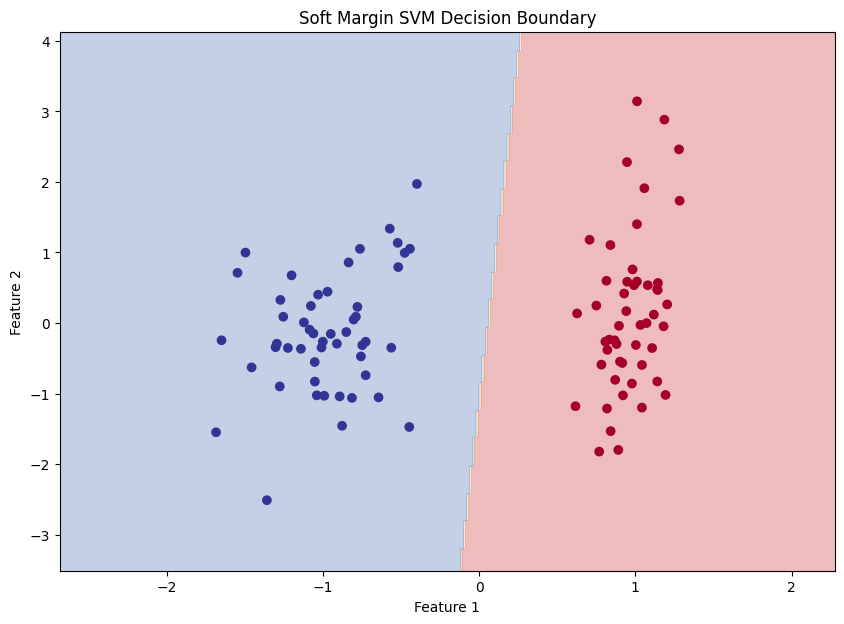

In [8]:
# Soft Margin Classification
print("\n### Soft Margin Classification")
soft_svm = SVC(kernel='linear', C=0.1)  # Smaller C means larger margin
soft_svm.fit(X_train, y_train)
soft_score = soft_svm.score(X_test, y_test)
print(f"Soft Margin SVM accuracy: {soft_score:.4f}")
plot_decision_boundary(soft_svm, X, y, "Soft Margin SVM Decision Boundary")

### Nonlinear SVM with Polynomial Kernel

In [9]:
# Generate nonlinear data
X_moons, y_moons = make_moons(n_samples=100, noise=0.15)
X_moons = StandardScaler().fit_transform(X_moons)
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2)

Polynomial SVM accuracy: 0.9000


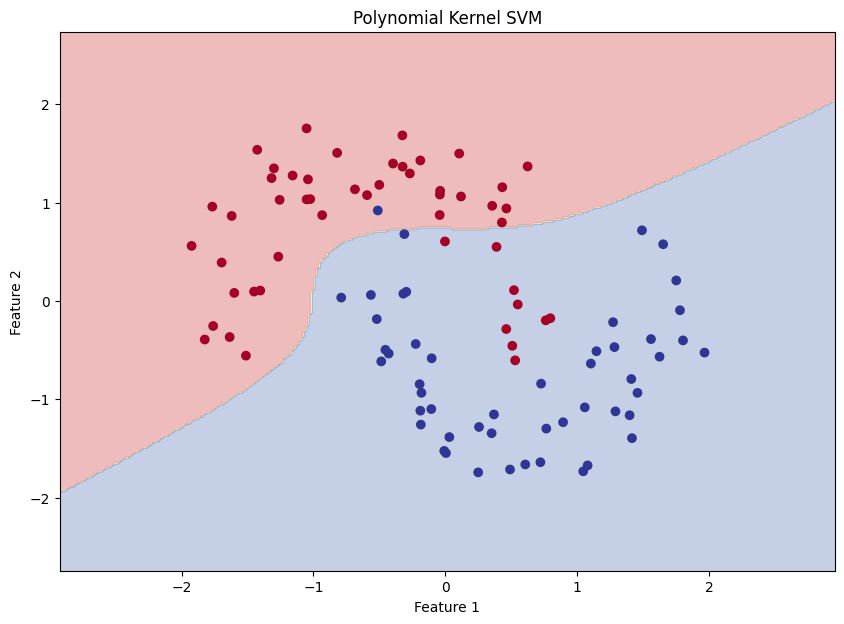

In [10]:

poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)
poly_score = poly_svm.score(X_test, y_test)
print(f"Polynomial SVM accuracy: {poly_score:.4f}")
plot_decision_boundary(poly_svm, X_moons, y_moons, "Polynomial Kernel SVM")


RBF SVM accuracy: 0.9000


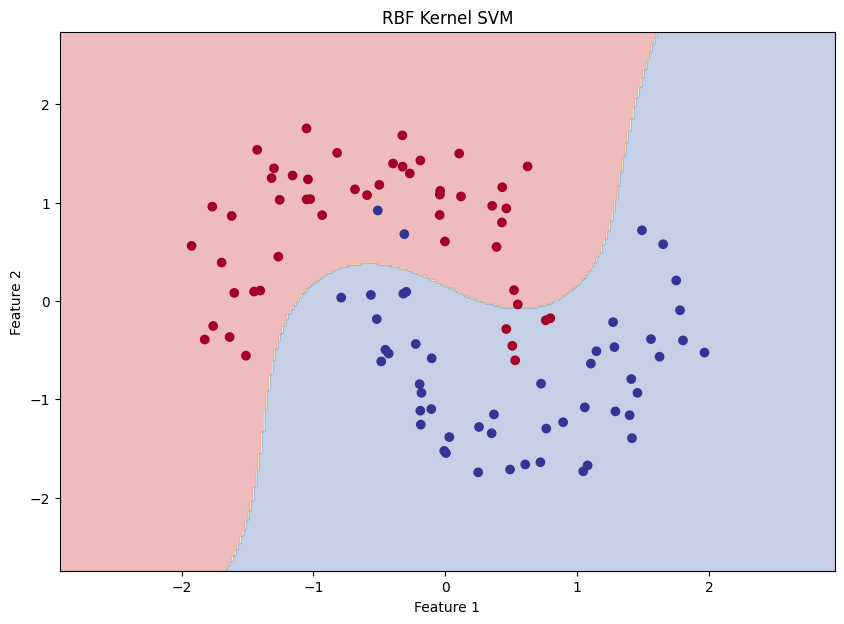

In [11]:
# RBF Kernel
rbf_svm = SVC(kernel='rbf', gamma='scale')
rbf_svm.fit(X_train, y_train)
rbf_score = rbf_svm.score(X_test, y_test)
print(f"RBF SVM accuracy: {rbf_score:.4f}")
plot_decision_boundary(rbf_svm, X_moons, y_moons, "RBF Kernel SVM")

### SVM Regression

In [12]:
X_reg = np.sort(5 * np.random.rand(100, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])

In [13]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_reg, y_reg)
y_pred = svr.predict(X_reg)

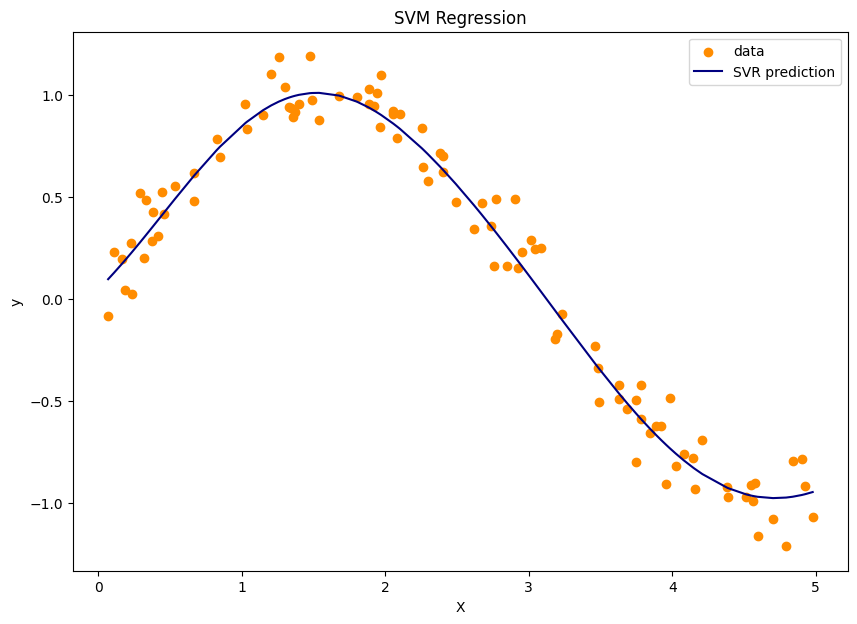

In [14]:

plt.figure(figsize=(10, 7))
plt.scatter(X_reg, y_reg, color='darkorange', label='data')
plt.plot(X_reg, y_pred, color='navy', label='SVR prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVM Regression')
plt.legend()
plt.show()

## Part 2: Decision Trees

In [15]:
# Training and Visualizing
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print(f"Decision Tree accuracy: {dt_score:.4f}")


Decision Tree accuracy: 0.8500


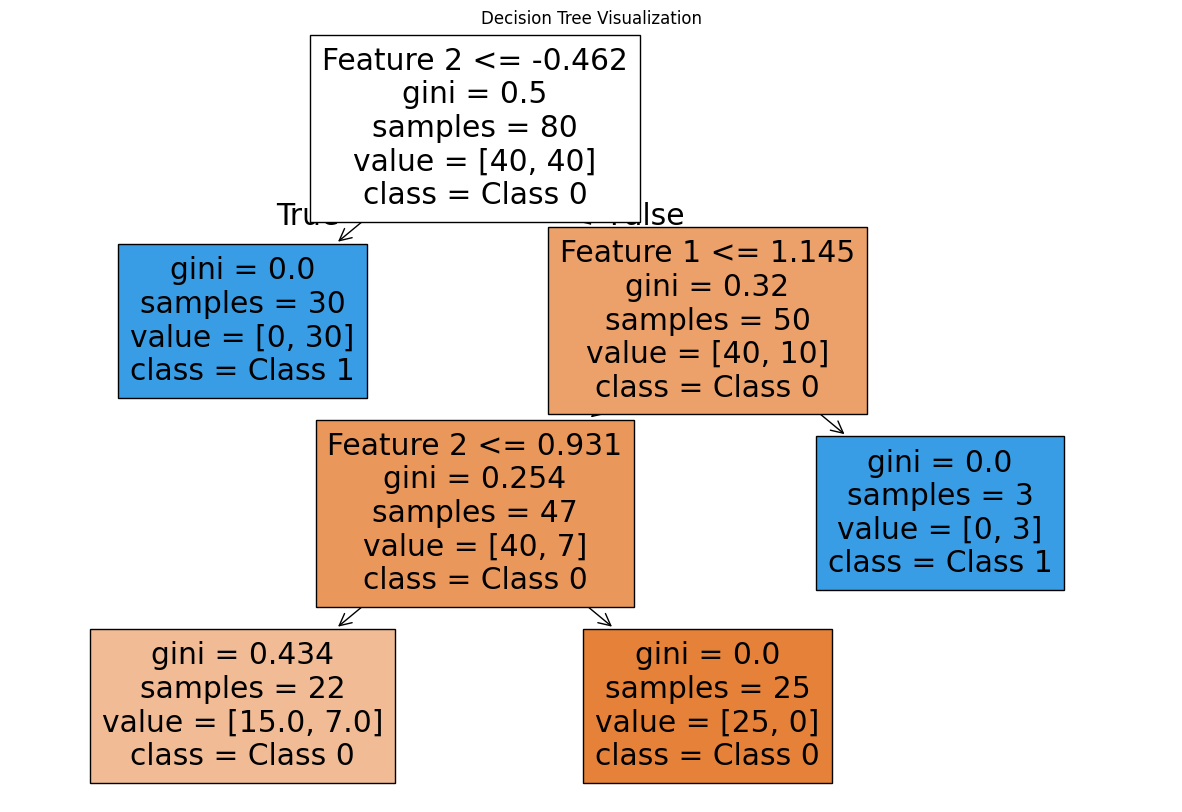

In [16]:
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=['Feature 1', 'Feature 2'], 
          class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [17]:
# Class Probabilities
print("\n### Estimating Class Probabilities")
probas = dt.predict_proba(X_test)
print("Sample probability predictions:")
print(probas[:5])



### Estimating Class Probabilities
Sample probability predictions:
[[1.         0.        ]
 [0.         1.        ]
 [0.68181818 0.31818182]
 [0.         1.        ]
 [0.         1.        ]]


In [39]:
# Gini vs Entropy
print("\n### Gini vs Entropy Comparison")
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt_gini.fit(X_train, y_train)
dt_entropy.fit(X_train, y_train)


### Gini vs Entropy Comparison


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [40]:
print(f"Gini accuracy: {dt_gini.score(X_test, y_test):.4f}")
print(f"Entropy accuracy: {dt_entropy.score(X_test, y_test):.4f}")

Gini accuracy: 0.8500
Entropy accuracy: 0.7500


## Part 3: k-Nearest Neighbors

In [24]:
# Different K values
## Impact of K Value
k_values = [1, 3, 5, 7, 11]
k_scores = []

In [25]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    k_scores.append(score)
    print(f"K={k}, Accuracy: {score:.4f}")


K=1, Accuracy: 1.0000
K=3, Accuracy: 1.0000
K=5, Accuracy: 1.0000
K=7, Accuracy: 1.0000
K=11, Accuracy: 0.9500


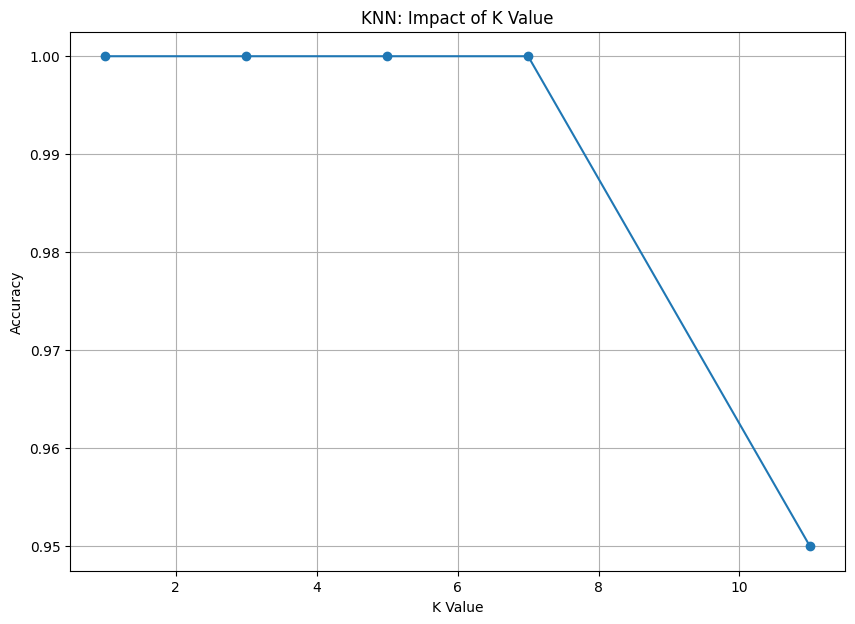

In [26]:
plt.figure(figsize=(10, 7))
plt.plot(k_values, k_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: Impact of K Value')
plt.grid(True)
plt.show()

In [27]:
# Manhattan vs Euclidean Distance
print("\n### Manhattan vs Euclidean Distance")
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)


### Manhattan vs Euclidean Distance


KNeighborsClassifier(metric='manhattan')

In [28]:
print(f"Euclidean Distance accuracy: {knn_euclidean.score(X_test, y_test):.4f}")
print(f"Manhattan Distance accuracy: {knn_manhattan.score(X_test, y_test):.4f}")


Euclidean Distance accuracy: 1.0000
Manhattan Distance accuracy: 1.0000


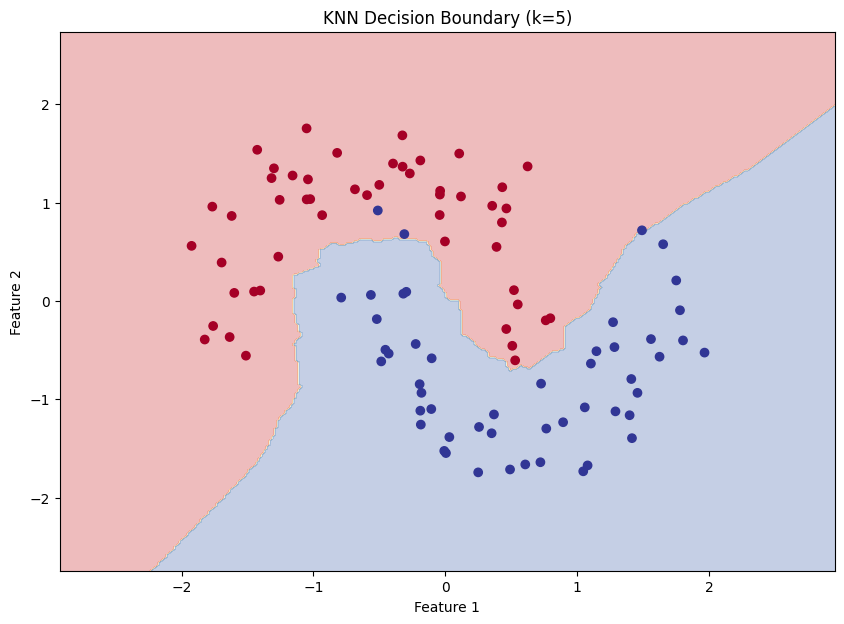

In [32]:
# Visualize KNN Decision Boundary
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
plot_decision_boundary(knn, X_moons, y_moons, f"KNN Decision Boundary (k={k})")